In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv(r"C:\Users\annap\Desktop\ML_Projects_Deploy\7-RandomForest\bank_DS_RandomForest.csv")
df.head()

,age,job,Unnamed: 2,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin,NaN,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin,NaN,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,NaN,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,NaN,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin,NaN,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
df['job'].unique()

array(['admin', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [7]:
df['pdays'].unique()

array([ -1, 166,  91, 147, 170, 150, 171, 126, 182, 110, 198, 174, 175,
        27, 128, 100, 177, 167, 122, 183, 195, 133, 178,  34,  10, 163,
       184, 154,  99,  93,   2, 242, 272,  76, 160,  90, 196, 246, 238,
       203, 268, 189, 267,  92,   9,  88,  85, 210, 257, 261, 270, 106,
       199, 112,  41, 294, 231, 239, 302, 135, 307, 222, 138, 323, 141,
       320, 264, 316, 315, 256, 146, 328,  74, 148, 327, 341, 145, 266,
       234, 345, 318, 325, 274, 343, 260, 305, 344, 254, 180, 340,  82,
       181, 278, 153,   4, 349, 334, 176,  87, 269,  86, 169,  83,  79,
         6, 259,  13, 161, 350,  84,  80, 164,  22, 296,  66, 263, 333,
        17,  89,  78, 286, 337, 364, 188, 342, 363, 352, 295, 353, 356,
       288, 367, 366, 359, 347, 370, 284, 300, 306, 361, 287, 301, 355,
       371, 292, 360, 358, 346, 357, 368, 312, 179, 329, 298, 372, 374,
       375, 291,  95, 109,  94,  98, 186, 101, 187, 321,  40,  96,  21,
        35,  97, 285, 103, 212, 293,  81,  38,  28,  67,  60, 12

In [8]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [9]:
df.describe()

,age,Unnamed: 2,balance,day,duration,campaign,pdays,previous
count,11162.000000,0.0,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,NaN,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,NaN,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,NaN,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,NaN,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,NaN,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,NaN,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,NaN,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         11162 non-null  int64  
 1   job         11162 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   education   11162 non-null  object 
 4   default     11162 non-null  object 
 5   balance     11162 non-null  int64  
 6   housing     11162 non-null  object 
 7   loan        11162 non-null  object 
 8   contact     11162 non-null  object 
 9   day         11162 non-null  int64  
 10  month       11162 non-null  object 
 11  duration    11162 non-null  int64  
 12  campaign    11162 non-null  int64  
 13  pdays       11162 non-null  int64  
 14  previous    11162 non-null  int64  
 15  poutcome    11162 non-null  object 
 16  deposit     11162 non-null  object 
dtypes: float64(1), int64(7), object(9)
memory usage: 1.4+ MB


In [11]:
df.isnull().sum()

age               0
job               0
Unnamed: 2    11162
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
deposit           0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# using encoder to change the dtype

from  sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['duration']=le.fit_transform(df['duration'])
df['balance']=le.fit_transform(df['balance'])
df['age']=le.fit_transform(df['age'])
df['month']=le.fit_transform(df['month'])
df['day']=le.fit_transform(df['day'])
df['contact']=le.fit_transform(df['contact'])
df['pdays']=le.fit_transform(df['pdays'])
df['job']=le.fit_transform(df['job'])


In [14]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         11162 non-null  int64  
 1   job         11162 non-null  int64  
 2   Unnamed: 2  0 non-null      float64
 3   education   11162 non-null  object 
 4   default     11162 non-null  object 
 5   balance     11162 non-null  int64  
 6   housing     11162 non-null  object 
 7   loan        11162 non-null  object 
 8   contact     11162 non-null  int64  
 9   day         11162 non-null  int64  
 10  month       11162 non-null  int64  
 11  duration    11162 non-null  int64  
 12  campaign    11162 non-null  int64  
 13  pdays       11162 non-null  int64  
 14  previous    11162 non-null  int64  
 15  poutcome    11162 non-null  object 
 16  deposit     11162 non-null  object 
dtypes: float64(1), int64(10), object(6)
memory usage: 1.4+ MB


Index(['age', 'job', 'Unnamed: 2', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'deposit'],
      dtype='object')

In [15]:

features=['age','job','balance','contact','day','month','duration','pdays']
target=['deposit']
x=df[features]
y=df[target]
x.shape,y.shape

((11162, 8), (11162, 1))

In [16]:
y=np.ravel(y)
y

array(['yes', 'yes', 'yes', ..., 'no', 'no', 'no'],
      shape=(11162,), dtype=object)

In [17]:
#define kfold cross validation

Var_kfold=KFold(n_splits=5,shuffle=True,random_state=42)

In [18]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model

RandomForestClassifier(random_state=42)

In [19]:
#loop the model using train and test

fold=1
for train_index,test_index in Var_kfold.split(x):
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]

    #test the model

    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)

    #accuracy

    accu_score=accuracy_score(y_test,y_pred)
    print("Accuracy Score",accu_score)

    fold=fold+1

Accuracy Score 0.8343036274070756
Accuracy Score 0.8450515002239141
Accuracy Score 0.8476702508960573
Accuracy Score 0.8449820788530465
Accuracy Score 0.8413978494623656


In [20]:
con_mat=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix:",con_mat)

Confusion Matrix: [[983 216]
 [138 895]]


In [21]:
accu_score=metrics.accuracy_score(y_test,y_pred)
print("Accuracy Score:",accu_score)
print("Accuracy in percentage:",(accu_score*100),"%")


Accuracy Score: 0.8413978494623656
Accuracy in percentage: 84.13978494623656 %


In [22]:
report=classification_report(y_test,y_pred)

print("classification_report:")
print(report)

classification_report:
              precision    recall  f1-score   support

          no       0.88      0.82      0.85      1199
         yes       0.81      0.87      0.83      1033

    accuracy                           0.84      2232
   macro avg       0.84      0.84      0.84      2232
weighted avg       0.84      0.84      0.84      2232



<Axes: xlabel='Predicted', ylabel='Actual'>

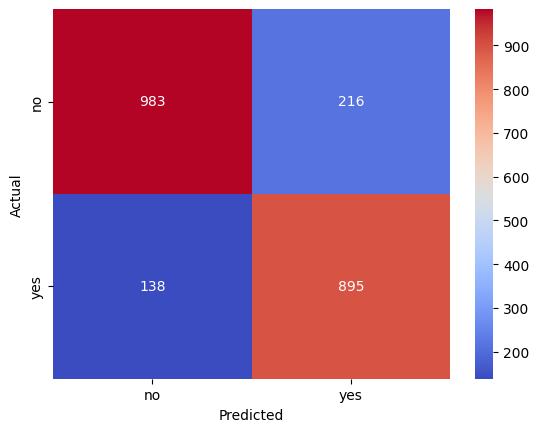

In [23]:
import seaborn as sn
con_mat=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(con_mat,annot=True,cmap='coolwarm',fmt='g')


In [24]:
#admin.', 'technician', 'services', 'management', 'retired',
# 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
#'unknown', 'self-employed'


def job_data(self,job):
    if(job=='admin'):
        return 0
    elif(job=='technician'):
        return 1
    elif(job=='services'):
        return 2
    elif(job=='management'):
        return 3
    elif(job=='retired'):
        return 4
    elif(job=='blue-collar'):
        return 5
    elif(job=='unemployed'):
        return 6
    elif(job=='entrepreneur'):
        return 7
    elif(job=='housemaid'):
        return 8
    elif(job=='unknown'):
        return 9
    elif(job=='self-employed'):
        return 10

In [25]:
def contact_data(self,contact):
    if(contact=='telephone'):
        return 0
    elif(contact=='unknown'):
        return 1
    elif(contact=='cellular'):
        return 2

In [26]:
#convert to pickle
import pickle
pickle.dump(model,open('bankdepositerandomforest.pkl','wb'))

In [27]:
#user input
age=int(input("Enter your age:"))
job=input("Enter your job:")
balance=int(input("Enter your bank balance:"))
contact=input("Enter your contact:")
day=int(input("Enter day:"))
month=int(input("Enter the month:"))
duration=int(input("Enter the duration:"))
pdays=int(input("Enter pdays:"))

le_contact=LabelEncoder()
job=le.transform([job])[0]
contact=le_contact.fit_transform([contact])[0]
#user=model.predict([[age,job,balance,contact,day,month,duration,pdays]])
#user

p=pickle.load(open('bankdepositerandomforest.pkl','rb'))
p.predict([[age,job,balance,contact,day,month,duration,pdays]])



array(['no'], dtype=object)